# PHYS 410. Project 2.
## By Anuar Yeraliyev, 47382130

We observed 1-D Ising model in the tutorial. Now we will cover 2-dimensional ising model which allows phase transitions.  
The energy of the given configuration is given by hamiltonian:
$$ H(\sigma) = -\sum_{i, j} J_{ij} \sigma_i \sigma_j - \mu \sum_{j} h_j \sigma_j $$
However, without the external magnetic field and assuming particles have the same interaction strength, this simplifies to:
$$ H(\sigma) = -J \sum_{i, j} \sigma_i \sigma_j $$

In order to find the ground state of the system, i.e. minimize its total energy, we are using Metropolis-Hastings algorithm and impose periodic boundary conditions. 

### Part 1.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

/Users/Anuar_The_Great/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
# For plotting the simulation uncomment this lines and subsequent below
# in the algorithm. Keep in mind plotting is extremely slow.
# %matplotlib auto
# mpl.use('GTKAgg') 

a = 2
N = 50
t = 500*N
J = 1
T = 3
plot_flag = 0
plt.ion()

grid = np.random.random((N, N))
grid[grid < 0.5] = -1.0
grid[grid >= 0.5] = 1.0

Elist = np.zeros((t, 1))
Mlist = np.zeros((t, 1))


# returns energy of a 2D Ising lattice at a given configuration
def compute_E(latt, N):
    Energy = 0
    for i in range(N):
        for j in range(N):
            S = latt[i,j]
            WF = latt[(i+1) % N, j] + latt[i, (j+1) % N] + latt[(i-1) % N, j] + latt[i, (j-1) % N]
            Energy += -WF * S # Each neighbor gives energy 1.0
    return Energy / 2. # Each par counted twice

# computes the change in energy by flipping the 
# spin at the point [i, j] with periodic boundary conditions (edges are connected)
def delta_energy(latt, i, j, N):
    deltaE = 2 * J * latt[i, j] * (latt[i, ((j+1) % (N))] +
                                   latt[i, ((j-1) % (N))] +
                                   latt[((i+1) % (N)), j] +
                                   latt[((i-1) % (N)), j])
    return deltaE

# Metropolis-Hastings algorithm
# Computes Energy, Magnetization, Heat Capacity and Magnetic Susceptibility
def metrop(J, T, N, t):
    grid = np.random.random((N, N))
    grid[grid < 0.5] = -1.0
    grid[grid >= 0.5] = 1.0
    Elist = np.zeros((t, ))
    Mlist = np.zeros((t, ))
    
    Energy = compute_E(grid, N)
#     cmap = mpl.colors.ListedColormap(['white','black'])
#     bounds=[-3., 0, 3.0]
#     norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#     inds = np.arange(N)     
    for i in xrange(t):
        s1 = int(np.random.random()*N)   # faster than randint(N)
        s2 = int(np.random.random()*N)
        dE = delta_energy(grid, s1, s2, N)
        p = math.exp(-dE / T)
        if np.random.random() <= p:
            grid[s1, s2] = -1.0 * grid[s1, s2]
            Energy += dE

#         if plot_flag: 
#             plt.clf()
#             img = plt.imshow(grid, interpolation='nearest', cmap = cmap, norm = norm)
#             plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-1, 1])
#             plt.pause(0.000001)
            
        Mlist[i] = np.abs(np.sum(grid)) 
        Elist[i] = Energy
        
    # Compute the system properties after thermalization
    E = np.mean(Elist[0.15*t:])
    M = np.mean(Mlist[0.15*t:])
    C_v = (np.mean(Elist[0.15*t:]**2) - E**2) / T**2
    Chi = (np.mean(Mlist[0.15*t:]**2) - M**2) / T
    
    return Elist, Mlist, C_v, Chi

### Part 2.
We compute different sizes of square lattices ($N=20, 40, 60$) and plot their energies to observe when the thermalization occurs. It's very difficult to evaluate an exact time for thermalization because Metropolis-Hastings algorithm is stochastic and fluctuates around equilibrium. This is especially evident when $N$ is small and fluctuations are very large. 

In order to assess the thermalization time, an average energy after thermalization occured is computed and the first point that crosses that line (in green) is assumed to be the time to thermalization. The green line represents the average of energy that's calculated after we it's noted that thermalization has certainly occured. Red line represents the time to 

The algorithm is also sensitive to every initialization because we randomly initialize the lattice of up and down spins. Therefore, I computed the average of $js = 10$ number of initializations.
Obtained times to thermalization are positively related to $N$, i.e. as $N$ increases, time also rises.

|        | N=20      | N=40        | N=60        |
|--------|-----------|-------------|-------------|
| Time steps | 3000-4000 | 10000-14000 | 24000-28000 |

It is very uncertain to tell what is the relationship between N and time to thermalization because we have only 3 points and all of them have large range, nevertheless, a relationship $N^2$ satisfies these empirical ranges and also makes sense since our lattice contains $N^2$ particles.

(10, 40000)
(10, 80000)
(10, 120000)


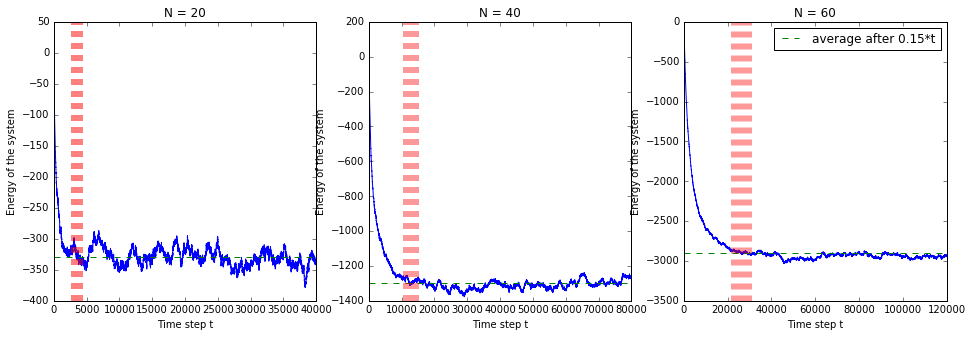

In [3]:
Ns = [20, 40, 60]
f, ax = plt.subplots(1, 3, figsize=(16, 5))
js = 10

for i, N in enumerate(Ns):
    t = 2*10**3 * N
    Es = np.zeros((js, t))
    print Es.shape
    Ms = np.zeros((js, t))
    for j in range(js):
        Es[j,], Ms[j,], c_v, chi = metrop(1, 3, N, t)
    Elist = np.mean(Es, axis=0)
    Mlist = np.mean(Ms, axis=0)
    eq_point = 0.15*t
    E_equil = np.mean(Elist[100*N:])
    M_equil = np.mean(Mlist[100*N:])
    ax[i].plot(Elist)
    ax[i].set_title("N = %d" % N)
    ax[i].set_ylabel("Energy of the system")
    ax[i].set_xlabel("Time step t")
    ax[i].axhline(E_equil, color='g', linestyle='--', label='average after 0.15*t')
plt.legend()
ax[0].axvline(3500, alpha=0.5, linewidth=12, color='r', linestyle='--')
ax[1].axvline(13000, alpha=0.4, linewidth=16, color='r', linestyle='--')
ax[2].axvline(26000, alpha=0.4, linewidth=21, color='r', linestyle='--')

### Part 3.
Multiple properties of the system have been computed for a range of $T = [2, 2.6]$ for three values of $N = [10, 20, 50]$
$$ M = \frac{1}{N} \sum_i \sigma_i $$
$$ C_v = \frac{Var(E)}{T^2}$$
$$ \chi = \frac{Var(M)}{T} $$

As one increases the N of the system generally becomes larger in absolute value. 
As temperature rises we observe several things:
- Energy is rising
- Magnetization is dropping
- Heat capacity peaks and drops
- Magnetic susceptibility peaks and drops

At certain temperature the system reaches Curie temperature where the spins become arbitrary, the system becomes paramagnetic and magnetization and heat capacity is expected to peak and drop closer to zero.
As $N$ increases, the sharp drop of heat capacity and susceptibility becomes more apparent. 
These observations are consistent with out theoretical expectations.

We have to run the simulation for each value of T for a large number of iterations so that to get a accurate answer as it's averaged out over most iterations after thermalization.

Curie temperature is observed to be around $2.3$. Both Heat Capacity and Magnetic Susceptability give good peaks in case of N=50. Since magnetic suceptibility is the largest, the system responds the most to external magnetic field the most at Curie temperature, 2.3. Magnetic susceptibility gives a sharper peak for N=50, so it should be a better signature of Curie temperature.

I didn't manage to compute for larger number of points in T because even this implementation took couple of hours. I didn't have enough time to eliminate the bottleneck, which was weirdly an indexing in delta_energy().

0 10 1000000
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 1 20 4000000
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 2 50 25000000
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


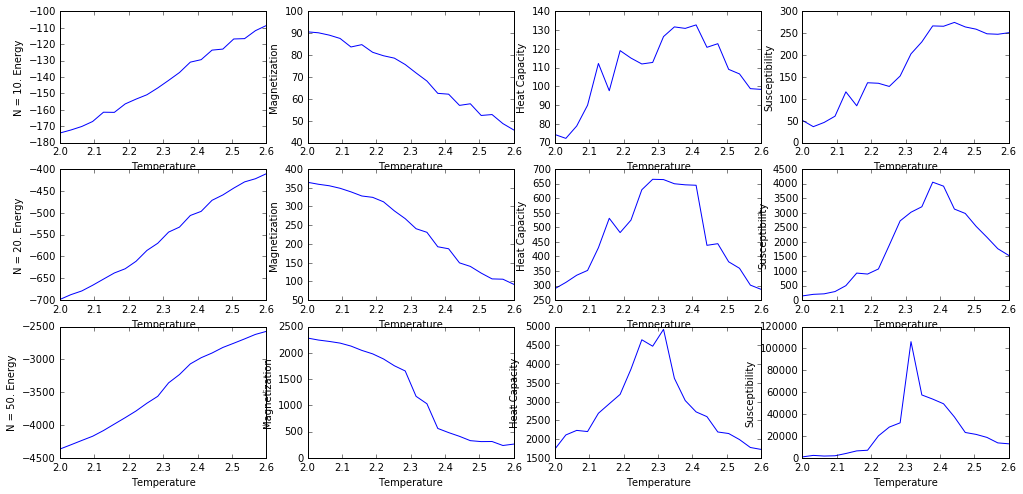

In [7]:
def func():
    Ns = [10, 20, 50]
    f, ax = plt.subplots(3, 4, figsize=(17, 8))

    js = 20

    Ts = np.linspace(2, 2.6, js)
    Es = np.zeros((js,))
    Ms = np.zeros((js,))
    C_vs = np.zeros((js,))
    Chis = np.zeros((js,))

    for i, N in enumerate(Ns):
        t = 10**4 * N**2
        print i, N, t
        for j, T in enumerate(Ts):
            print j,
            Elist, Mlist, C_vs[j], Chis[j] = metrop(1, T, N, t)
            Es[j] = np.mean(Elist[0.15*t:])
            Ms[j] = np.mean(Mlist[0.15*t:])
        ax[i][0].plot(Ts, Es)
        ax[i][0].set_xlim(2.0, 2.6)
        ax[i][0].set_ylabel("N = %d. Energy" % N)
        ax[i][0].set_xlabel("Temperature")
        ax[i][1].plot(Ts, Ms)
        ax[i][1].set_xlim(2.0, 2.6)
        ax[i][1].set_ylabel("Magnetization")
        ax[i][1].set_xlabel("Temperature")
        ax[i][2].plot(Ts, C_vs)
        ax[i][2].set_xlim(2.0, 2.6)
        ax[i][2].set_ylabel("Heat Capacity")
        ax[i][2].set_xlabel("Temperature")
        ax[i][3].plot(Ts, Chis)
        ax[i][3].set_xlim(2.0, 2.6)
        ax[i][3].set_ylabel("Susceptibility")
        ax[i][3].set_xlabel("Temperature")
func()